In [ ]:
import scanpy as sc
import pandas as pd
import numpy as np

adata = sc.read("/mnt/data/project/25_02_15_stag_analysis/merge_annotate_result/TNRC18_Th1/Annotated_phenotype_hypr_seq.h5ad")
print(adata.X.shape[1])
sc.pp.filter_genes(adata, min_counts=3)
print(adata.X.shape[1])
adata_subset = adata[~(adata.obs["genotype_annotation"]=="unedited")]

sc.pp.normalize_total(adata_subset, 1e6)
adata_subset.X = np.log(adata_subset.X+1)


sc.pp.pca(adata_subset)
sc.pp.neighbors(adata_subset)

sc.tl.leiden(adata_subset, resolution=0.1)
#sc.pl.umap(adata_subset, color="leiden")

adata_subset_v1  = adata_subset[~(adata_subset.obs["leiden"]=="2")]

sc.pp.pca(adata_subset_v1)
sc.pp.neighbors(adata_subset_v1)
sc.tl.leiden(adata_subset_v1, resolution=0.1)
sc.tl.umap(adata_subset_v1)

sc.write("TNRC18_Th1_subset_geno_cluster.h5ad", adata_subset_v1)

sc.tl.rank_genes_groups(adata_subset_v1, groupby="leiden", method="wilcoxon")
df_deg = sc.get.rank_genes_groups_df(adata_subset_v1, group=None)



2315
2315


/tmp/ipykernel_102150/539711112.py:11: FutureWarning: The specified parameters ('target_sum',) are no longer positional. Please specify them like `target_sum=1000000.0`
  sc.pp.normalize_total(adata_subset, 1e6)
/mnt/data/miniconda3/envs/stag/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/tmp/ipykernel_102150/539711112.py:18: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata_subset, resolution=0.1)
/mnt/data/miniconda3/envs/stag/lib/python3.9/site-packages/scanpy/preprocessing/_pca.py:317: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca


In [2]:
adata_subset_v1 = sc.read("/mnt/data/project/25_02_15_stag_analysis/notebooks/TNRC18_Th1_CD4_CD8/TNRC18_Th1_subset_geno_cluster.h5ad")


In [3]:
table = pd.read_csv("/mnt/data/project/25_02_15_stag_analysis/notebooks/TNRC18_Th1_CD4_CD8/4g_genelist_2.csv", sep="\t", header=None)

In [4]:
genes = [str(i)  for i in table[0] if str(i) in adata_subset_v1.var_names]


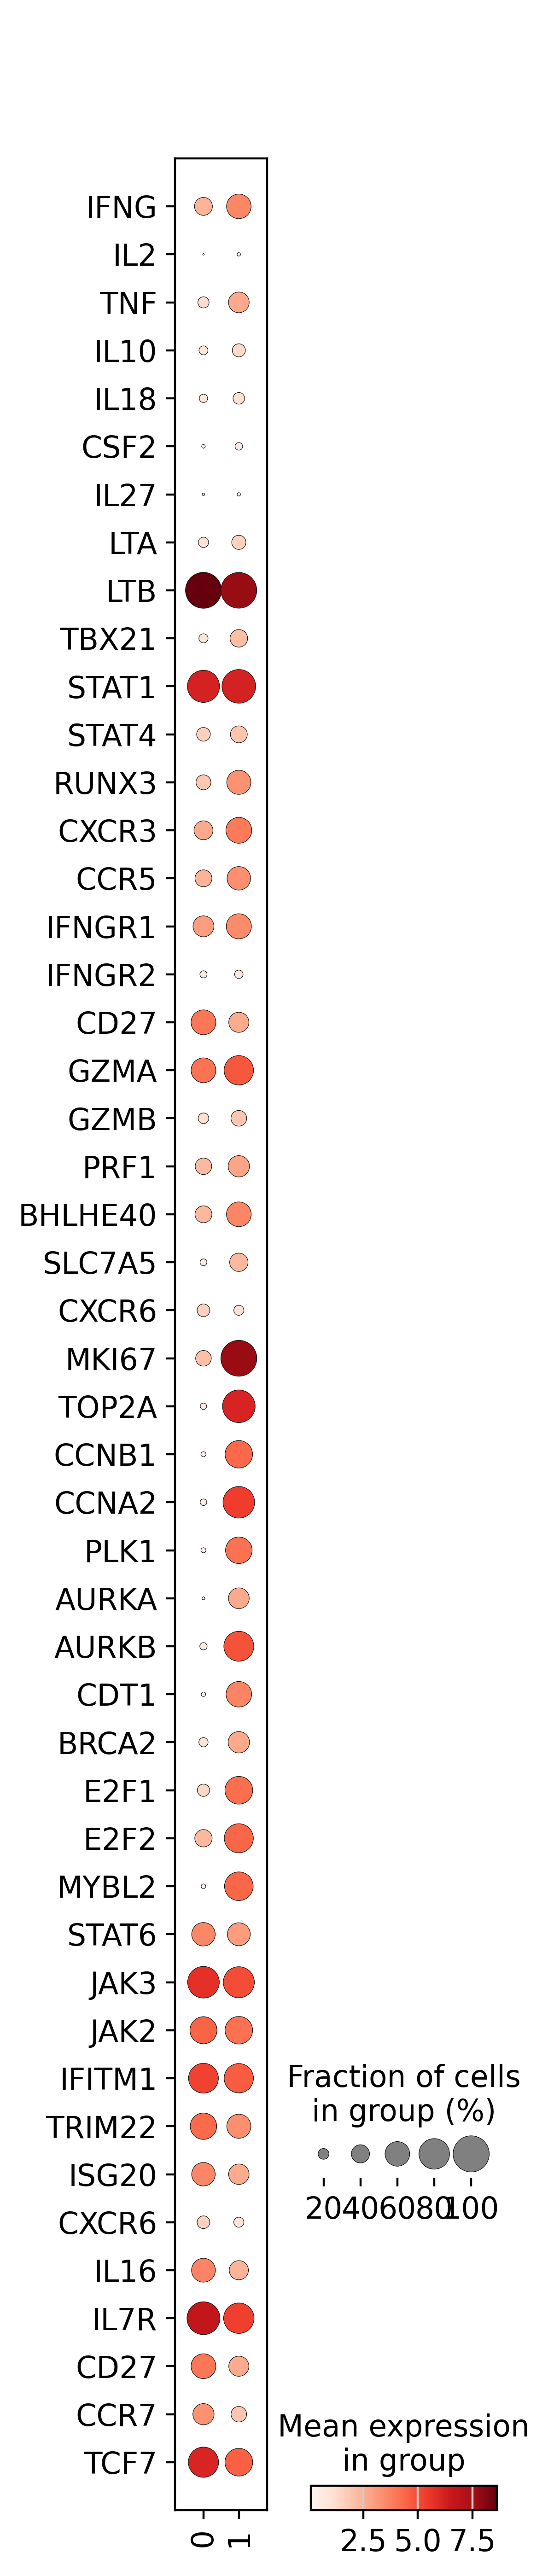

In [5]:
import scanpy as sc
sc.settings.set_figure_params(dpi=200)

sc.pl.dotplot(adata_subset_v1, genes, groupby="leiden", standard_scale=None, dendrogram=True, swap_axes=True)



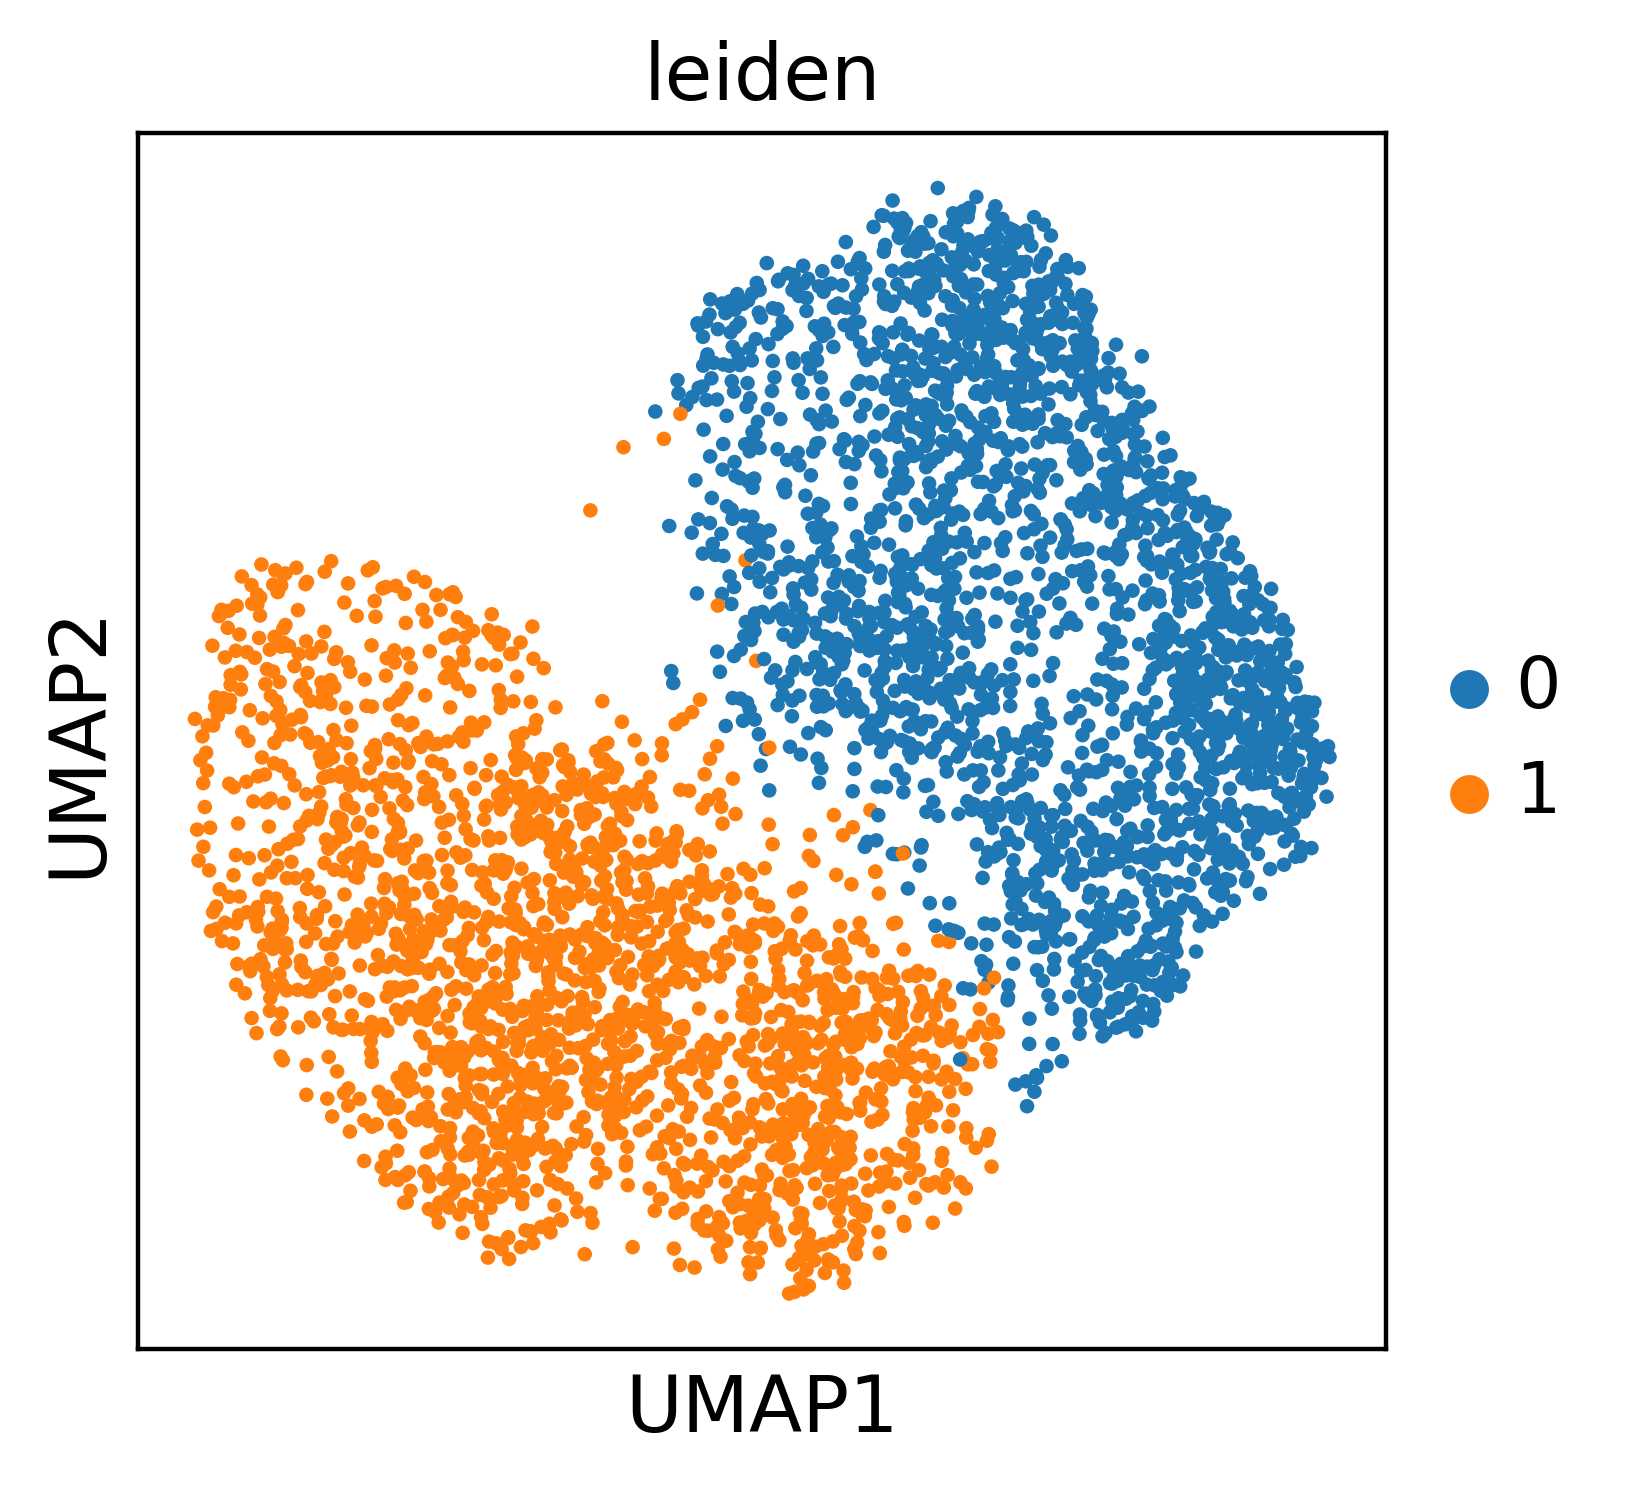

In [ ]:
sc.pl.umap(adata_subset_v1,color="leiden")


In [7]:
import matplotlib.pyplot as plt

In [ ]:
def plot_genotype_cluster_composition(adata, genotype_column='genotype_annotation', cluster_column='leiden', save_path="./", task_name=""):
    """
    Plots the composition of leiden clusters within each genotype as a stacked bar chart.
    
    Parameters:
    - adata: AnnData object containing the data.
    - genotype_column: str, the column in adata.obs representing genotype annotations.
    - cluster_column: str, the column in adata.obs representing leiden cluster labels.
    """
    
    # Extract the relevant columns from adata.obs
    df = adata.obs[[genotype_column, cluster_column]]
    
    # Count the occurrences of each leiden cluster within each genotype
    composition = df.groupby([genotype_column, cluster_column]).size().unstack(fill_value=0)
    
    # Normalize counts to get the proportion of each leiden cluster within each genotype
    composition = composition.div(composition.sum(axis=1), axis=0)
    # Plot the composition as a stacked bar chart
    ax = composition.plot(kind='bar', stacked=True, figsize=(10, 7))
    
    # Add labels and title
    plt.title('Leiden Cluster Composition by Genotype')
    plt.xlabel('Genotype')
    plt.ylabel('Proportion of Each Cluster')
    plt.legend(title=cluster_column, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    # plt.savefig(f"{save_path}/{task_name}_composition.svg")
    # plt.savefig(f"{save_path}/{task_name}_composition.png")

/tmp/ipykernel_102150/407516318.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  composition = df.groupby([genotype_column, cluster_column]).size().unstack(fill_value=0)


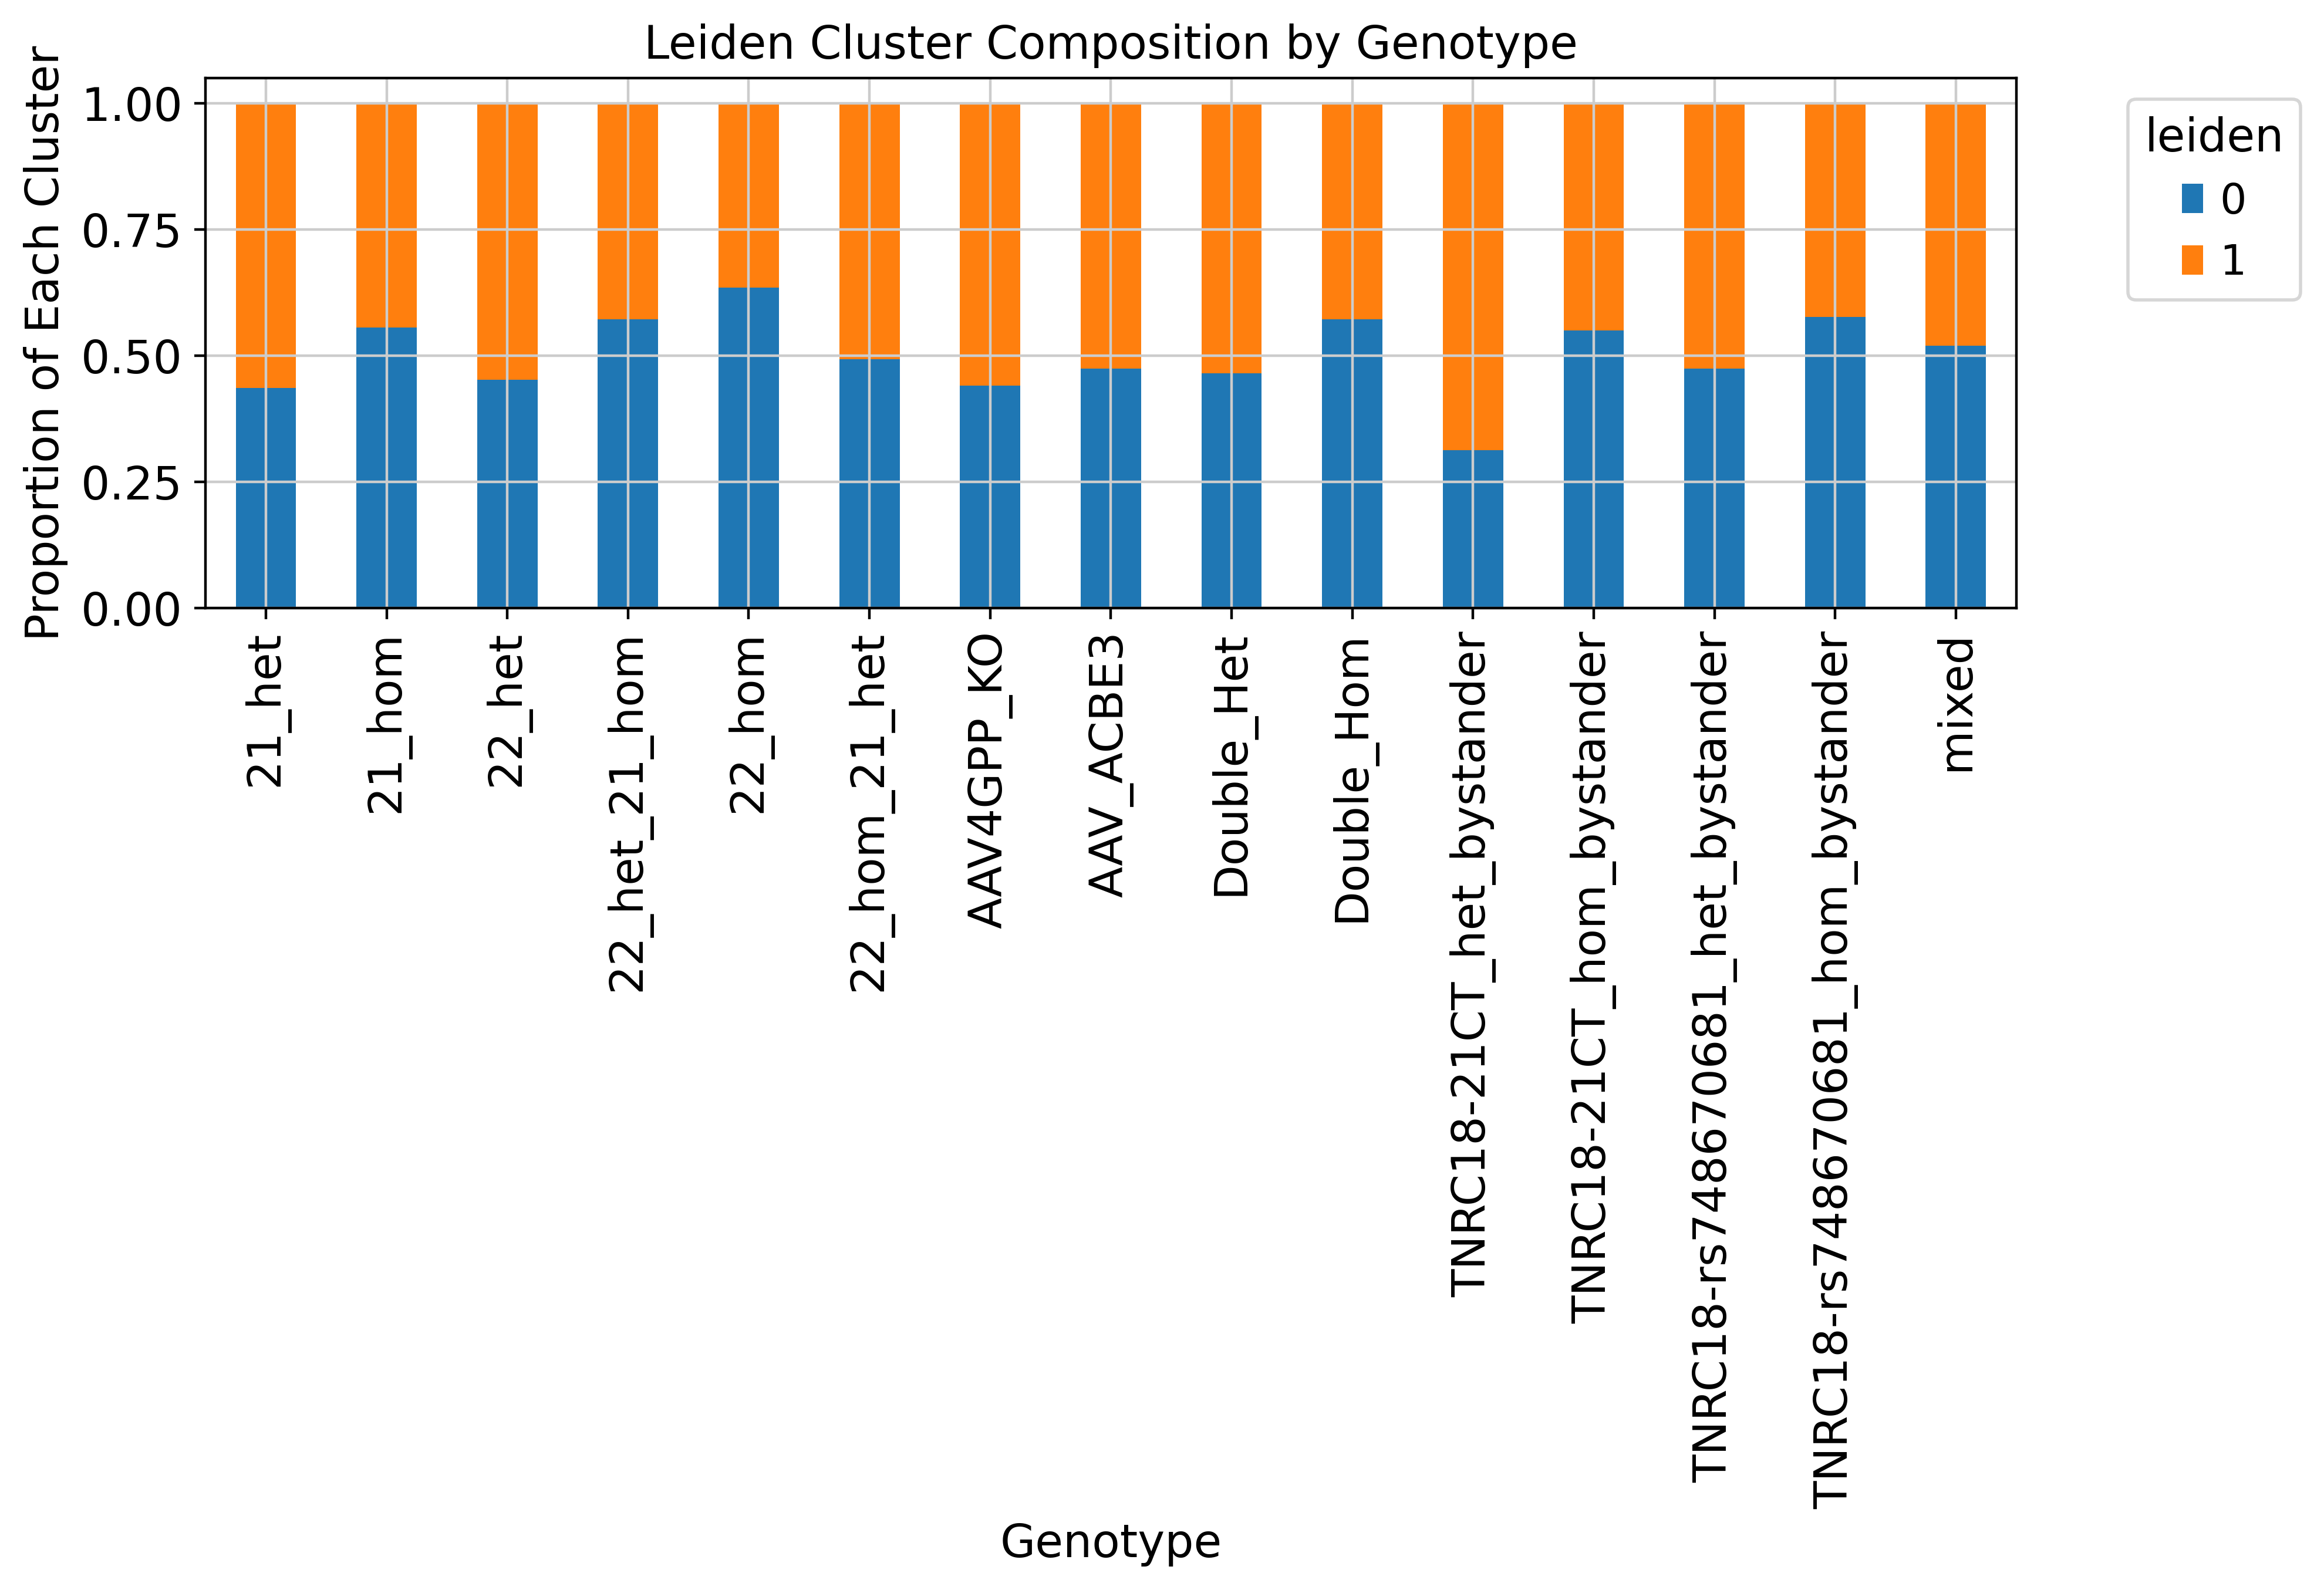

In [9]:
plot_genotype_cluster_composition(adata_subset_v1, genotype_column="genotype_annotation")